In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1. Data Ingestion

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 2. Data Preparation

In [3]:
# Making column name consistent
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Investing data types of each columns
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
# Keep only those feature which have object(string) data types
mask = df.dtypes == 'object'
object_columns = list(df.dtypes[mask].index)

In [7]:
# Making object columns data consistent (lowercase + underscore seperated)
for column in object_columns:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 3. Explaoratory Data Analysis

#### Unique Value Investingation

In [9]:
# Investing unique values
for col in df.columns:
    print(f"Feature name: {col}")
    print(f"Total unique values: {df[col].nunique()}")
    print(f"{df[col].unique()[:5]}")
    print('\n---\n')

Feature name: make
Total unique values: 48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

---

Feature name: model
Total unique values: 914
['1_series_m' '1_series' '100' '124_spider' '190-class']

---

Feature name: year
Total unique values: 28
[2011 2012 2013 1992 1993]

---

Feature name: engine_fuel_type
Total unique values: 10
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

---

Feature name: engine_hp
Total unique values: 356
[335. 300. 230. 320. 172.]

---

Feature name: engine_cylinders
Total unique values: 9
[ 6.  4.  5.  8. 12.]

---

Feature name: transmission_type
Total unique values: 5
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

---

Feature name: driven_wheels
Total unique values: 4
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

---

Feature name: number_of_doors
Total unique values: 3
[ 2.  4.  3. nan]

---

Feature name: market_category
T

#### Distribution of Price

<Axes: xlabel='msrp', ylabel='Count'>

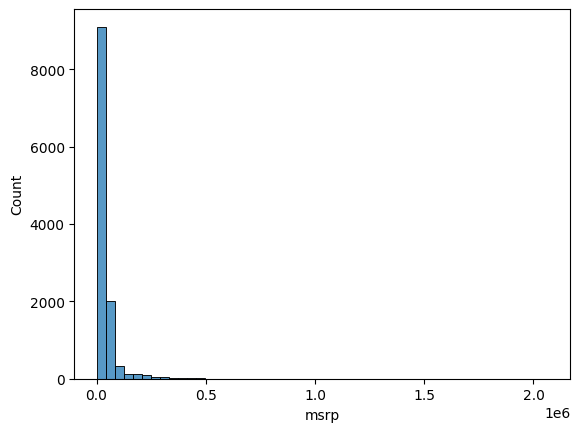

In [10]:
# Histogram
sns.histplot(df.msrp, bins=50)

**Observation**: Long tail distribution.

<Axes: xlabel='msrp', ylabel='Count'>

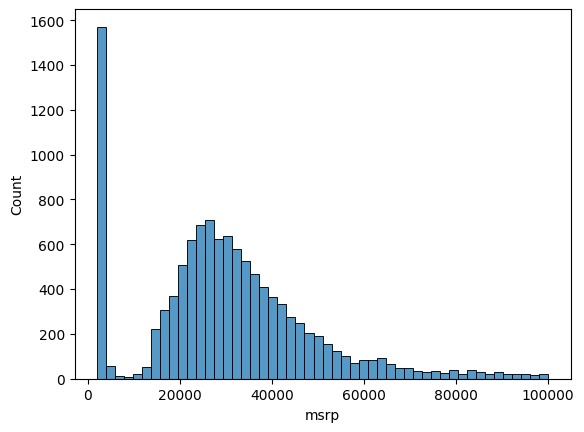

In [11]:
# Histogram for initials values
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

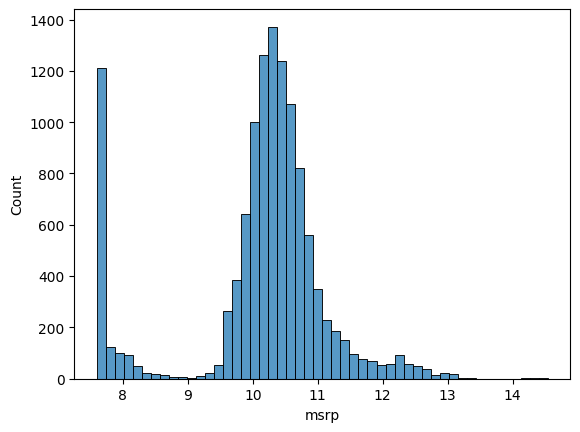

In [12]:
# Long tail distribution -> Normal distribution
msrp_logs = np.log1p(df.msrp)
sns.histplot(msrp_logs, bins=50)

#### Missing Values

In [13]:
# Missing values in each column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 4. Setting Validation Model
3 Part:
- Train [60%]
- Valdation [20%]
- Test [20%]

In [14]:
# Total number of datapoints
n = len(df)
n

11914

In [15]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [16]:
n, n_train + n_val + n_test

(11914, 11914)

In [17]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [18]:
# Dividing the dataframe in three part
df_train = df.iloc[: n_train]
df_val = df.iloc[n_train: n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [19]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [20]:
idx = np.arange(n)

In [21]:
np.random.seed(2)
np.random.shuffle(idx)

In [22]:
# Dividing the dataframe in three part after shuffling the index
df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [23]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [24]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [25]:
# Resetting the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [27]:
df_train = df_train.drop(['msrp'], axis=1)
df_val = df_val.drop(['msrp'], axis=1)
df_test = df_test.drop(['msrp'], axis=1)

### 5. Linear Regression

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [29]:
# Feature vector
x_i = [453, 11, 86]

# Bais term and weight vector
w_0 = 7.17
w = [0.01, 0.04, 0.002]

In [30]:
def linear_regression(x_i):
    n = len(x_i)

    pred = w_0
    for j in range(n):
        pred = pred + w[j]*x_i[j]

    return pred

In [31]:
np.expm1(linear_regression(x_i))

222347.2221101062

### 6. Linear Regression: Vector Form

In [32]:
# Feature vector
x_i = [453, 11, 86]

# Bais term and weight vector
w_0 = 7.17
w = [0.01, 0.04, 0.002]

In [33]:
def dot(x_i, w):
    n = len(x_i)

    res = 0.0
    for j in range(n):
        res = res + x_i[j]*w[j]

    return res

In [34]:
w_new = [w_0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [35]:
def linear_regression(x_i):
    x_i = [1] + x_i
    return dot(x_i, w_new)

In [36]:
np.expm1(linear_regression(x_i))

222347.2221101062

In [37]:
# Now implementing for matrix
x_1 = [1, 453, 11, 86]
x_2 = [1, 148, 24, 1385]
x_3 = [1, 132, 25, 2031]

X = [x_1, x_2, x_3]
X = np.array(X)
X

array([[   1,  453,   11,   86],
       [   1,  148,   24, 1385],
       [   1,  132,   25, 2031]])

In [38]:
def linear_regression(X):
    return X.dot(w_new)

In [39]:
np.expm1(linear_regression(X))

array([222347.22211011, 237992.82334859, 768348.51018973])

### 7. Training Linear Regression Model

In [40]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]    
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [41]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
y

[10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

**Theory:**  
- y = X*w
- X*w = y
- X<sup>T</sup>(X*w) = X<sup>T</sup> * y
- (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> (X*w) = (X<sup>T</sup> X)<sup>-1</sup> (X<sup>T</sup> * y)
- (X<sup>T</sup> X)<sup>-1</sup> (X<sup>T</sup> X) w = (X<sup>T</sup> X)<sup>-1</sup> (X<sup>T</sup> * y)
- w = (X<sup>T</sup> X)<sup>-1</sup> (X<sup>T</sup> * y)

In [42]:
def linear_regression_train(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [43]:
linear_regression_train(X, y)

(30006.77669255554, array([ -22.77425287, -257.69412959,   -2.3012064 ]))

### 8. Baseline Model

In [44]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [45]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].values

In [46]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [47]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [48]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [49]:
X_train = df_train[base].fillna(0).values

In [50]:
w_0, w = linear_regression_train(X_train, y_train)

In [51]:
y_pred = w_0 + X_train.dot(w)

<Axes: ylabel='Count'>

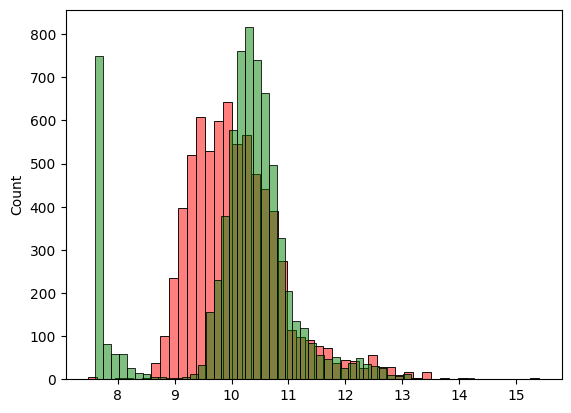

In [52]:
# Plotting the histogram
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_train, bins=50, color='green', alpha=0.5)

### 9. RMSE [Root Mean Squared Error]

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$


In [53]:
def rmse(y, y_pred):
    error = y - y_pred
    squared_error = error ** 2
    mse = squared_error.mean()
    rmse = np.sqrt(mse)

    return rmse

In [54]:
rmse(y_train, y_pred)

0.7554192603920132

### 10. Model Validation

In [55]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [56]:
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

0.761653099130156

### 11. Feature Engineering

In [57]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [58]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
    
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [59]:
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

0.5172055461058299

<Axes: ylabel='Count'>

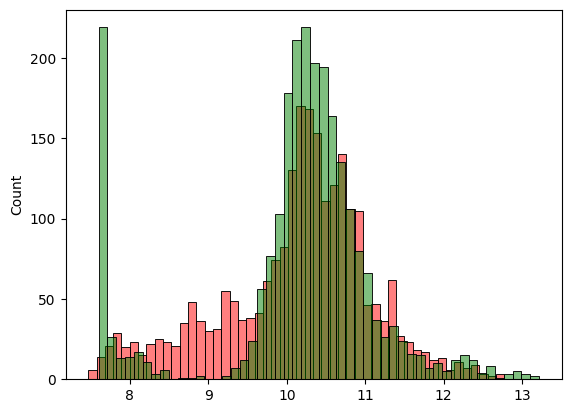

In [60]:
# Plotting the histogram
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_val, bins=50, color='green', alpha=0.5)

### 12. Categorical Variable

In [61]:
df.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [62]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [63]:
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

0.5157995641501727

In [64]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [65]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [66]:
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

0.5076038849556717

In [67]:
df.dtypes.index

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [68]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [69]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [70]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [71]:
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

30.090493475303816

### 13. Regularization

In [72]:
def linear_regression_train_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [73]:
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train_reg(X_train, y_train, r=0.01)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

0.45652199014498973

### 14. Tuning The Model

In [74]:
for r in [0.0, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 1, 10]:
    # Training
    X_train = prepare_X(df_train)
    w_0, w = linear_regression_train_reg(X_train, y_train, r=r)
    
    # Validation
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    
    # Calculating RMSE
    score = rmse(y_val, y_pred)

    print(f'r={r}, rmse={score}')

r=0.0, rmse=30.090493475303816
r=0.01, rmse=0.45652199014498973
r=0.001, rmse=0.4565175087432952
r=0.0001, rmse=0.4565170612096512
r=1e-05, rmse=0.4565170284979097
r=1e-06, rmse=0.45651727754184623
r=1, rmse=0.4572204317998218
r=10, rmse=0.47014569321001465


In [75]:
r = 0.001
# Training
X_train = prepare_X(df_train)
w_0, w = linear_regression_train_reg(X_train, y_train, r)

# Validation
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# Calculating RMSE
rmse(y_val, y_pred)

0.4565175087432952

### 15. Using The Model

In [76]:
df_full_train = pd.concat([df_train, df_val]) 

In [77]:
df_full_train = df_full_train.reset_index(drop=True)

In [78]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [79]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [80]:
w_0, w = linear_regression_train_reg(X_full_train, y_full_train, r=0.001)

In [81]:
# Validation
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

# Calculating RMSE
rmse(y_test, y_pred)

0.4517749307388584

In [82]:
car = df_test.iloc[10].to_dict()
car

{'make': 'mazda',
 'model': '3',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 155.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 41,
 'city_mpg': 29,
 'popularity': 586}

In [83]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mazda,3,2016,regular_unleaded,155.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,41,29,586


In [84]:
X_small = prepare_X(df_small)
X_small

array([[155.,   4.,  41.,  29., 586.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.]])

In [85]:
y_pred = w_0 + X_small.dot(w)
y_pred

array([10.16097869])

In [86]:
np.expm1(y_pred)[0]

25872.60695438403

In [87]:
np.expm1(y_test[10])

17844.999999999993